In [1]:
import quandl
quandl.ApiConfig.api_key = "CXJRhqCt_s4YnjCDfYq4"
import numpy as np
import pandas as pd

In [2]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'NKE'], date={'gte':'2000-01-01', 'lte':'2018-12-31'}, paginate=True)

In [3]:
pivoted = prices.pivot(index='date', columns='ticker', values='close')
pivoted.head()

ticker,AAPL,NKE
date,,
2000-01-03,3.998,6.015
2000-01-04,3.661,5.688
2000-01-05,3.714,6.016
2000-01-06,3.393,5.985
2000-01-07,3.554,5.985


In [4]:
cov_matrix = pivoted.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

ticker,AAPL,NKE
ticker,,
AAPL,0.000720,0.000131
NKE,0.000131,0.000358


In [5]:
e_r = pivoted.resample('Y').last().pct_change().mean()
e_r

ticker
AAPL    0.458721
NKE     0.161956
dtype: float64

In [6]:
sd = pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sd

ticker
AAPL    0.424182
NKE     0.299187
dtype: float64

In [10]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ticker,,
AAPL,0.458721,0.424182
NKE,0.161956,0.299187


In [11]:
p_ret = []
p_vol = []
p_weights = []

num_portfolios = 1

In [12]:
for portfolio in range(num_portfolios):
    weights = [.25, .75]
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)

In [13]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [16]:
portfolios  = pd.DataFrame(data)
portfolios.index = ['portfolio1']
portfolios

,Returns,Volatility
portfolio1,0.236147,0.271883


In [18]:
op_space = pd.concat([portfolios, assets])
op_space

,Returns,Volatility
portfolio1,0.236147,0.271883
AAPL,0.458721,0.424182
NKE,0.161956,0.299187


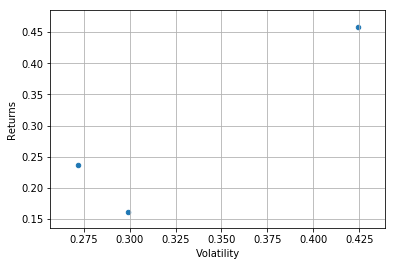

In [20]:
op_space.plot.scatter(x='Volatility', y='Returns', grid=True)